In [54]:
# Useful starting lines
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load the data

In [133]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=False, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

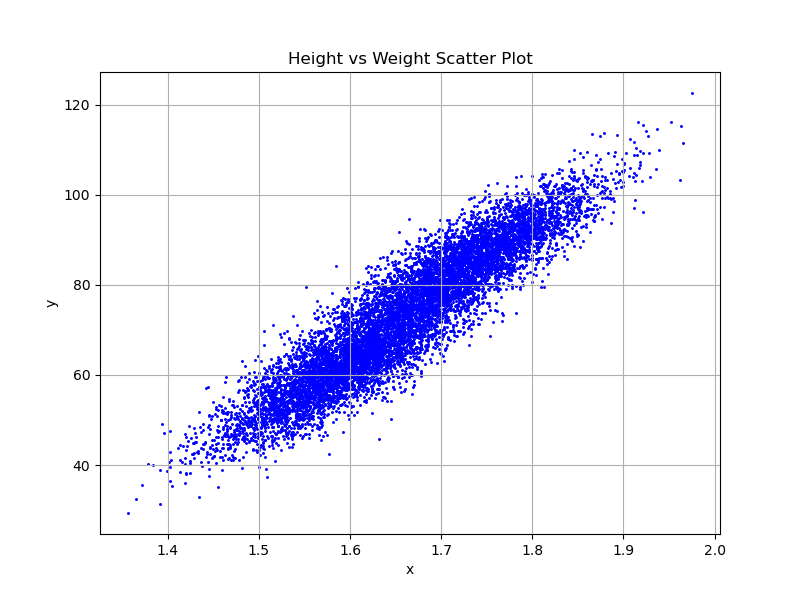

In [134]:
plt.figure(figsize=(8,6))
plt.scatter(height, weight, marker='.', color='b', s=5)
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.title("Height vs Weight Scatter Plot")
plt.show()

In [87]:
y.shape, tx.shape

((10000,), (10000, 2))

The column of X~ are one column of 1 and the column of weight information, each row is a different weight. The 1's are for the intercept.

### NB: throughout this laboratory the data has the following format: 
  * there are **N = 10000** data entries
  * **y** represents the column vector containing weight information -- that which we wish to predict/the output (see also the first page of $\texttt{exercise02.pdf}$). Its **shape** is **(N,)**.
  * **tx** represents the matrix $\tilde{X}$ formed by laterally concatenating a column vector of 1s to the column vector of height information -- the input data (see also the first page of $\texttt{exercise02.pdf}$). Its **shape** is **(N,2)**.

# 1. Computing the Cost Function
Fill in the `compute_loss` function below:

In [119]:
def compute_loss(y, tx, w):
    """Calculate the loss using either MSE or MAE.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        w: numpy array of shape=(2,). The vector of model parameters.

    Returns:
        the value of the loss (a scalar), corresponding to the input parameters w.
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute loss by MSE
    # ***************************************************
    
    e = y -  tx @ w #tx.dot(w)
    mse = (1/(2*len(y))) * np.dot(e,e)
    
    return mse

In [120]:
# Testing the function
w_test = np.array([1,2])
print(compute_loss(y, tx, w_test))

2694.483365887084


# 2. Grid Search

Fill in the function `grid_search()` below:

In [121]:
from costs import *
from grid_search import *
from plots import *


def grid_search(y, tx, grid_w0, grid_w1):
    """Algorithm for grid search.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        grid_w0: numpy array of shape=(num_grid_pts_w0, ). A 1D array containing num_grid_pts_w0 values of parameter w0 to be tested in the grid search.
        grid_w1: numpy array of shape=(num_grid_pts_w1, ). A 1D array containing num_grid_pts_w1 values of parameter w1 to be tested in the grid search.

    Returns:
        losses: numpy array of shape=(num_grid_pts_w0, num_grid_pts_w1). A 2D array containing the loss value for each combination of w0 and w1
    """

    losses = np.zeros((len(grid_w0), len(grid_w1)))
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute loss for each combination of w0 and w1.
    # ***************************************************
    
    for i,w0 in enumerate(grid_w0):
        for j,w1 in enumerate (grid_w1):
            w = np.array([w0,w1])
            losses[i,j] = compute_loss(y,tx,w)
            


    min_loss, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, losses)


    print(f"Best parameters: w0 = {w0_star}, w1 = {w1_star}, with loss = {min_loss}")
    
    mean_x = np.mean(tx[:,1])
    std_x = np.std(tx[:,1])
    
    # Visualization
    plt.close("all")
    fig = grid_visualization(losses, grid_w0, grid_w1, mean_x, std_x, tx[:,1], y)
    plt.show()

    
    return losses      
  

Best parameters: w0 = 66.66666666666669, w1 = 16.666666666666686, with loss = 42.424483146782485


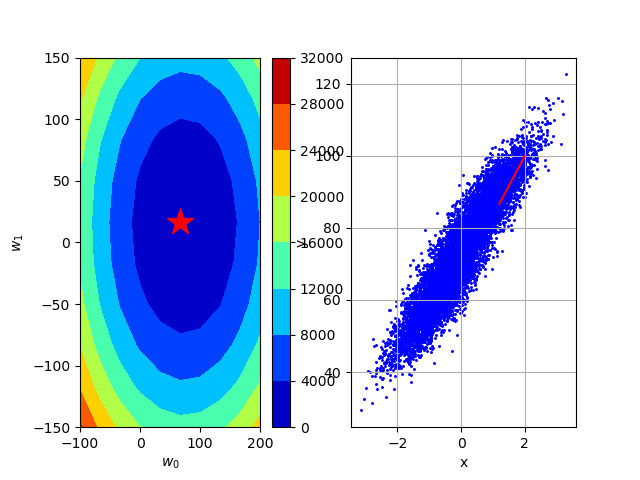

In [122]:
# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=10)
losses = grid_search(y,tx,grid_w0, grid_w1)


Best parameters: w0 = 71.42857142857142, w1 = 15.306122448979579, with loss = 18.79354101952324


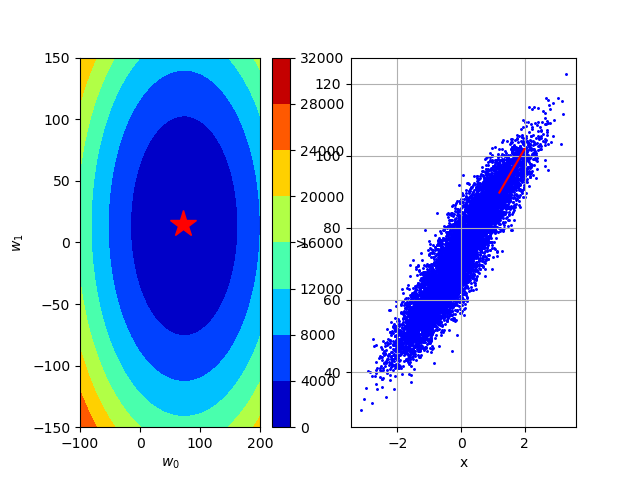

In [123]:
# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=50)
losses = grid_search(y,tx,grid_w0, grid_w1)

Let us play with the grid search demo now!

Best parameters: w0 = 72.72727272727272, w1 = 13.636363636363626, with loss = 15.558703368609534


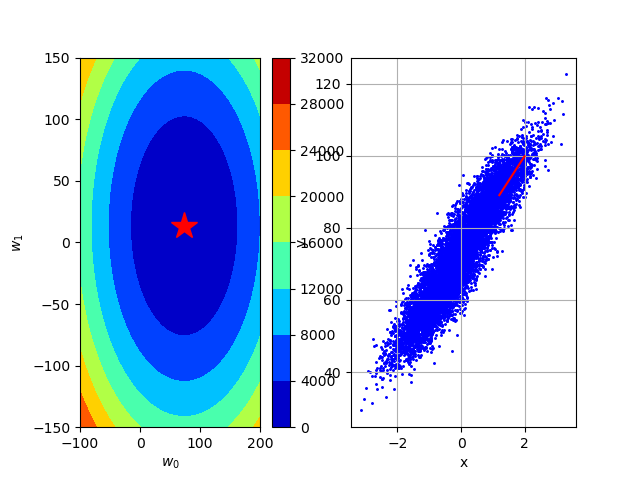

Grid Search: loss*=15.558703368609534, w0*=72.72727272727272, w1*=13.636363636363626, execution time=0.573 seconds


In [124]:
from grid_search import generate_w, get_best_parameters
from plots import grid_visualization

# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=100)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print(
    "Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
        l=loss_star, w0=w0_star, w1=w1_star, t=execution_time
    )
)

# Plot the results
#fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
#fig.set_size_inches(10.0, 6.0)
#fig.savefig("grid_plot")  # Optional saving

# 3. Gradient Descent

Again, please fill in the functions `compute_gradient` below:

In [125]:
def compute_gradient(y, tx, w):
    """Computes the gradient at w.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        w: numpy array of shape=(2, ). The vector of model parameters.

    Returns:
        An numpy array of shape (2, ) (same shape as w), containing the gradient of the loss at w.
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute gradient vector
    # ***************************************************
    
    N = len(y)
    e = y - tx @ w
    grad = -1/N * (tx.T @ e)
    
    return grad

In [113]:
w_test1 = np.array( [100,20])
w_test2 = np.array([50,10])
print(compute_gradient(y, tx, w_test1))
print(compute_gradient(y, tx, w_test2)) 

[26.706078    6.52028757]
[-23.293922    -3.47971243]


Please fill in the functions `gradient_descent` below:

In [114]:
def gradient_descent(y, tx, initial_w, max_iters, gamma):
    """The Gradient Descent (GD) algorithm.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        max_iters: a scalar denoting the total number of iterations of GD
        gamma: a scalar denoting the stepsize

    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of GD
        ws: a list of length max_iters + 1 containing the model parameters as numpy arrays of shape (2, ),
            for each iteration of GD (as well as the final weights)
    """
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # ***************************************************
        loss = compute_loss(y, tx, w)
        g = compute_gradient(y, tx, w)
        # ***************************************************
        # INSERT YOUR CODE HERE
        # ***************************************************
        w = w - gamma*g

        # store w and loss
        ws.append(w)
        losses.append(loss)
        print(
            "GD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
                bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]
            )
        )

    return losses, ws

Test your gradient descent function through gradient descent demo shown below:

In [115]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
start_time = datetime.datetime.now()
gd_losses, gd_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("GD: execution time={t:.3f} seconds".format(t=exection_time))

GD iter. 0/49: loss=2792.236712759168, w0=51.30574540147361, w1=9.435798704492287
GD iter. 1/49: loss=265.3024621089605, w0=66.69746902191571, w1=12.266538315840005
GD iter. 2/49: loss=37.87837955044127, w0=71.31498610804834, w1=13.115760199244331
GD iter. 3/49: loss=17.41021212017447, w0=72.70024123388814, w1=13.370526764265632
GD iter. 4/49: loss=15.568077051450459, w0=73.11581777164007, w1=13.446956733772023
GD iter. 5/49: loss=15.402284895265298, w0=73.24049073296565, w1=13.469885724623941
GD iter. 6/49: loss=15.38736360120863, w0=73.27789262136334, w1=13.476764421879516
GD iter. 7/49: loss=15.386020684743531, w0=73.28911318788263, w1=13.478828031056189
GD iter. 8/49: loss=15.38589982226167, w0=73.29247935783842, w1=13.47944711380919
GD iter. 9/49: loss=15.385888944638307, w0=73.29348920882516, w1=13.47963283863509
GD iter. 10/49: loss=15.385887965652202, w0=73.29379216412119, w1=13.479688556082861
GD iter. 11/49: loss=15.385887877543452, w0=73.29388305071, w1=13.479705271317192
GD

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

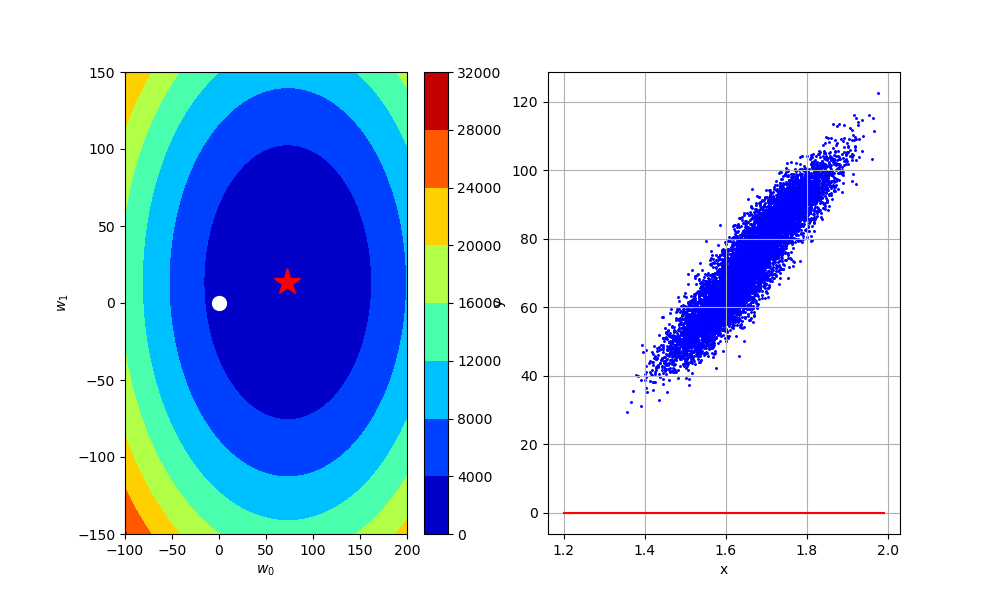

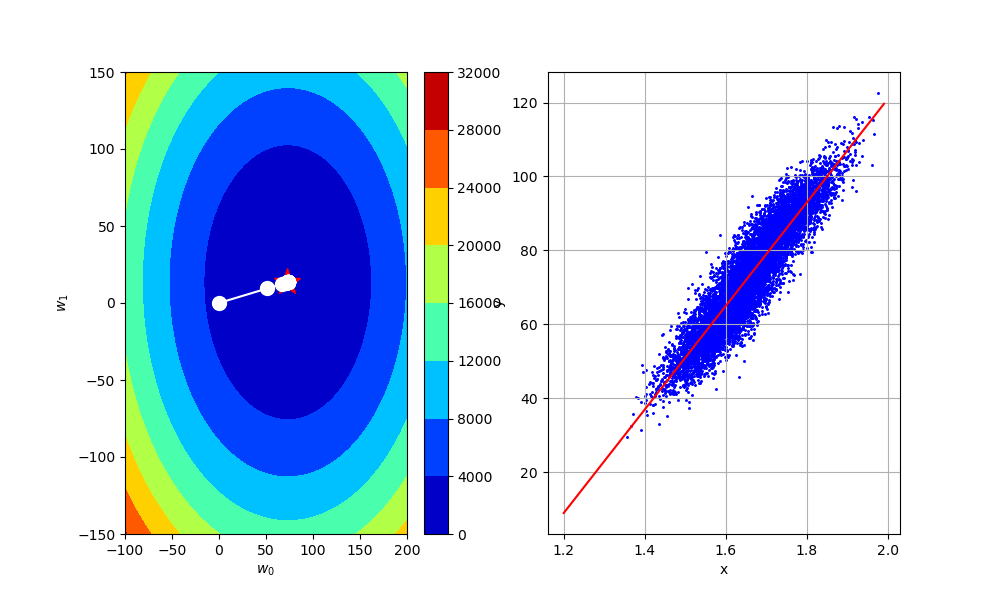

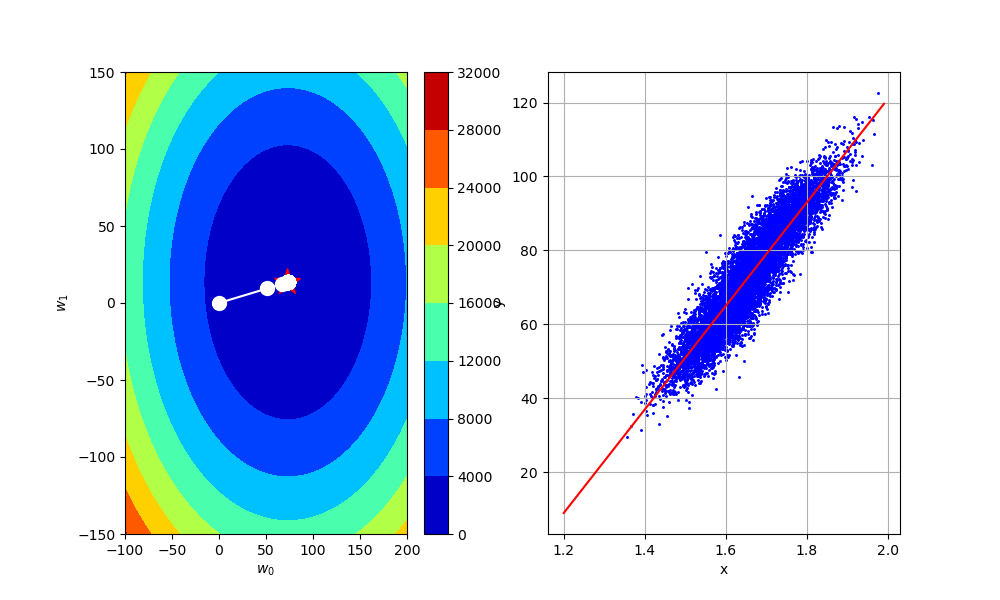

In [117]:
# Time Visualization
from ipywidgets import IntSlider, interact


def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gd_losses,
        gd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    fig.set_size_inches(10.0, 6.0)


interact(plot_figure, n_iter=IntSlider(min=1, max=len(gd_ws)))

In [126]:
step_sizes = [0.001, 0.01, 0.5, 1, 2, 2.5]
for gamma in step_sizes:
    print(f"Running GD with step size gamma={gamma}")
    gd_losses, gd_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
    print("\n")

Running GD with step size gamma=0.001
GD iter. 0/49: loss=2792.236712759168, w0=0.07329392200210516, w1=0.013479712434988982
GD iter. 1/49: loss=2786.685787960212, w0=0.14651455008220823, w1=0.02694594515754296
GD iter. 2/49: loss=2781.1459594599287, w0=0.2196619575342312, w1=0.0403987116473744
GD iter. 3/49: loss=2775.617205076818, w0=0.29273621757880214, w1=0.05383802537071596
GD iter. 4/49: loss=2770.0995026737196, w0=0.3657374033633285, w1=0.06726389978033422
GD iter. 5/49: loss=2764.592830157724, w0=0.43866558796207034, w1=0.08067634831554285
GD iter. 6/49: loss=2759.0971654800887, w0=0.5115208443762135, w1=0.09407538440221626
GD iter. 7/49: loss=2753.6124866361442, w0=0.5843032455339424, w1=0.10746102145280302
GD iter. 8/49: loss=2748.138771665208, w0=0.6570128642905136, w1=0.12083327286633919
GD iter. 9/49: loss=2742.6759986504994, w0=0.7296497734283284, w1=0.13419215202846183
GD iter. 10/49: loss=2737.224145719047, w0=0.8022140456570052, w1=0.14753767231142237
GD iter. 11/49: l

In [127]:
initializations = [[0,0], [100,10], [-1000,1000]]
gamma = 0.1
for w0 in initializations:
    print(f"Running GD with w0 ={w0}")
    w_initial = np.array(w0)
    gd_losses, gd_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
    print("\n")

Running GD with w0 =[0, 0]
GD iter. 0/49: loss=2792.236712759168, w0=7.329392200210517, w1=1.3479712434988982
GD iter. 1/49: loss=2264.6350560300034, w0=13.92584518039998, w1=2.561145362647905
GD iter. 2/49: loss=1837.2777140793805, w0=19.8626528625705, w1=3.6530020698820125
GD iter. 3/49: loss=1491.118267099376, w0=25.20577977652397, w1=4.63567310639271
GD iter. 4/49: loss=1210.7291150455721, w0=30.014593999082088, w1=5.520077039252339
GD iter. 5/49: loss=983.6139018819912, w0=34.342526799384395, w1=6.316040578826005
GD iter. 6/49: loss=799.6505792194906, w0=38.23766631965647, w1=7.032407764442306
GD iter. 7/49: loss=650.6402878628651, w0=41.74329188790134, w1=7.677138231496976
GD iter. 8/49: loss=529.9419518639984, w0=44.898354899321724, w1=8.257395651846178
GD iter. 9/49: loss=432.17629970491635, w0=47.73791160960007, w1=8.779627330160462
GD iter. 10/49: loss=352.98612145605995, w0=50.29351264885058, w1=9.249635840643318
GD iter. 11/49: loss=288.84207707448616, w0=52.59355358417604,

# 4. Stochastic gradient descent

In [128]:
def compute_stoch_gradient(y, tx, w):
    """Compute a stochastic gradient at w from a data sample batch of size B, where B < N, and their corresponding labels.

    Args:
        y: numpy array of shape=(B, )
        tx: numpy array of shape=(B,2)
        w: numpy array of shape=(2, ). The vector of model parameters.

    Returns:
        A numpy array of shape (2, ) (same shape as w), containing the stochastic gradient of the loss at w.
    """

    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: implement stochastic gradient computation. It's the same as the usual gradient.
    # ***************************************************
    N = len(y)
    e = y - tx @ w
    grad = -1/N * (tx.T @ e)
    
    return grad


def stochastic_gradient_descent(y, tx, initial_w, batch_size, max_iters, gamma):
    """The Stochastic Gradient Descent algorithm (SGD).

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        batch_size: a scalar denoting the number of data points in a mini-batch used for computing the stochastic gradient
        max_iters: a scalar denoting the total number of iterations of SGD
        gamma: a scalar denoting the stepsize

    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of SGD
        ws: a list of length max_iters containing the model parameters as numpy arrays of shape (2, ), for each iteration of SGD
    """

    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w

    for n_iter in range(max_iters):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: implement stochastic gradient descent.
        # ***************************************************
        for minibatch_y, minibatch_tx in batch_iter(y, tx, batch_size=batch_size, num_batches=1):
            
            grad = compute_stoch_gradient(minibatch_y, minibatch_tx, w)
            loss = compute_loss(minibatch_y, minibatch_tx, w)
            w = w - gamma*grad
        
        ws.append(w.copy())
        losses.append(loss)
        
            

        print(
            "SGD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
                bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]
            )
        )
    return losses, ws

In [129]:
# from stochastic_gradient_descent import *

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.1
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = stochastic_gradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma
)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

SGD iter. 0/49: loss=2016.8265765202486, w0=6.351104748813782, w1=-1.266455752362034
SGD iter. 1/49: loss=1500.0948007766215, w0=11.828503402876898, w1=-2.5261789926678393
SGD iter. 2/49: loss=1755.2109264349729, w0=17.753384712126852, w1=-1.402141646752881
SGD iter. 3/49: loss=1997.6895624173417, w0=24.074285854238383, w1=-0.15067833645757034
SGD iter. 4/49: loss=539.1096319666591, w0=27.35791077790631, w1=-2.7194443270336706
SGD iter. 5/49: loss=178.13317891891612, w0=29.24541271919758, w1=-5.5147214117684555
SGD iter. 6/49: loss=688.1898211700938, w0=32.95537180568383, w1=-7.832597605323791
SGD iter. 7/49: loss=1311.3550396764344, w0=38.07661196735646, w1=-6.213455662443409
SGD iter. 8/49: loss=1004.0426838003148, w0=42.55777852038775, w1=-4.918501055926683
SGD iter. 9/49: loss=1098.1087826295707, w0=47.24416045665707, w1=-0.42931183081012847
SGD iter. 10/49: loss=960.4005599899441, w0=51.62685497028666, w1=3.6285086434792406
SGD iter. 11/49: loss=663.7056202662261, w0=55.2702205030

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

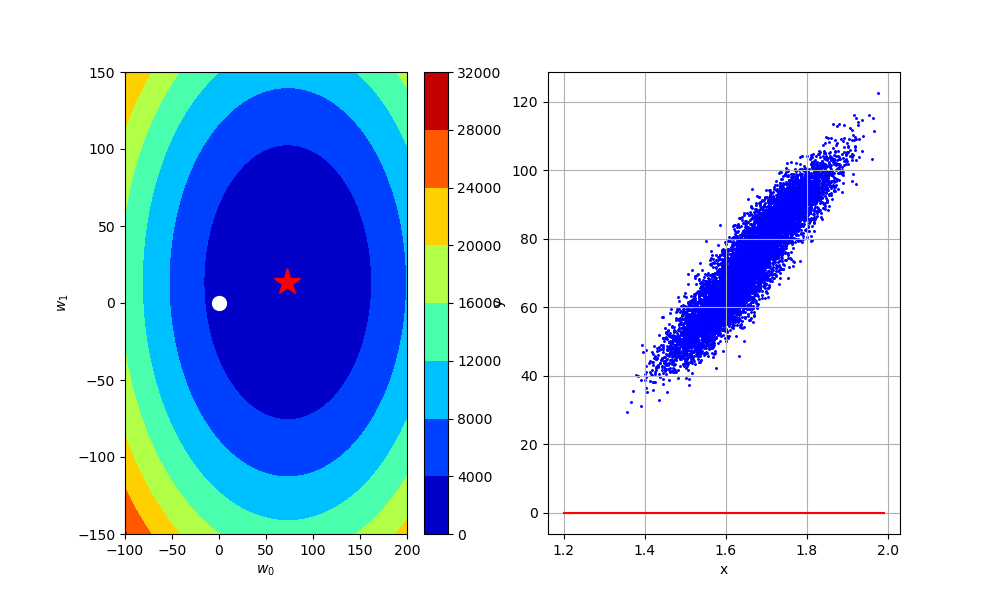

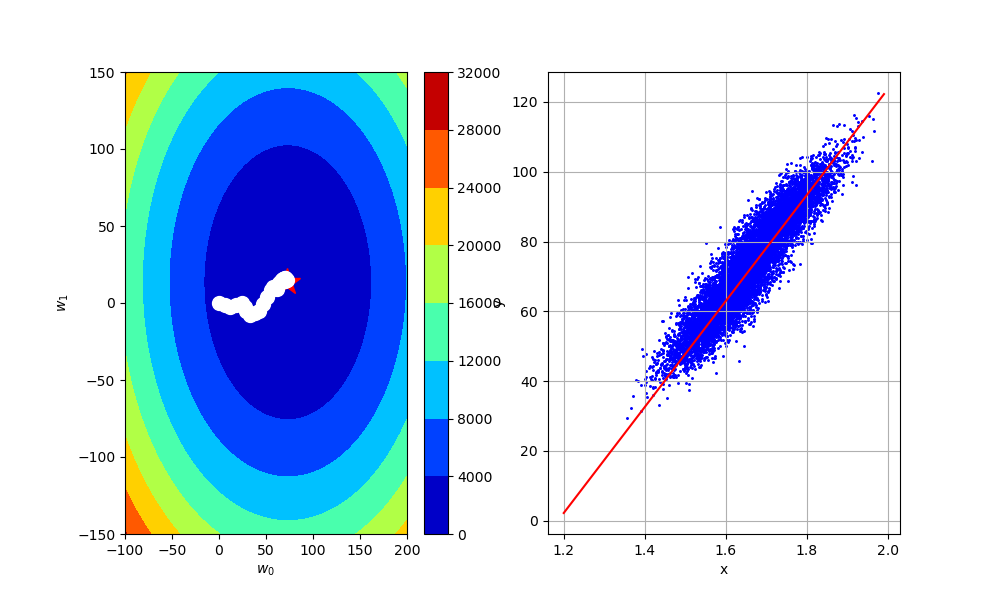

In [130]:
# Time Visualization
from ipywidgets import IntSlider, interact


def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        sgd_losses,
        sgd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    fig.set_size_inches(10.0, 6.0)


interact(plot_figure, n_iter=IntSlider(min=1, max=len(sgd_ws)))

# 5. Effect of Outliers and MAE Cost Function

In [137]:
import datetime
from helpers import *

# ***************************************************
# INSERT YOUR CODE HERE
# TODO: reload the data by subsampling first, then by subsampling and adding outliers
# ***************************************************
height_sub, weight_sub, gender = load_data(sub_sample=True, add_outlier=False)
x_sub, mean_x_sub, std_x_sub = standardize(height_sub)
y_sub, tx_sub = build_model_data(x_sub, weight_sub)


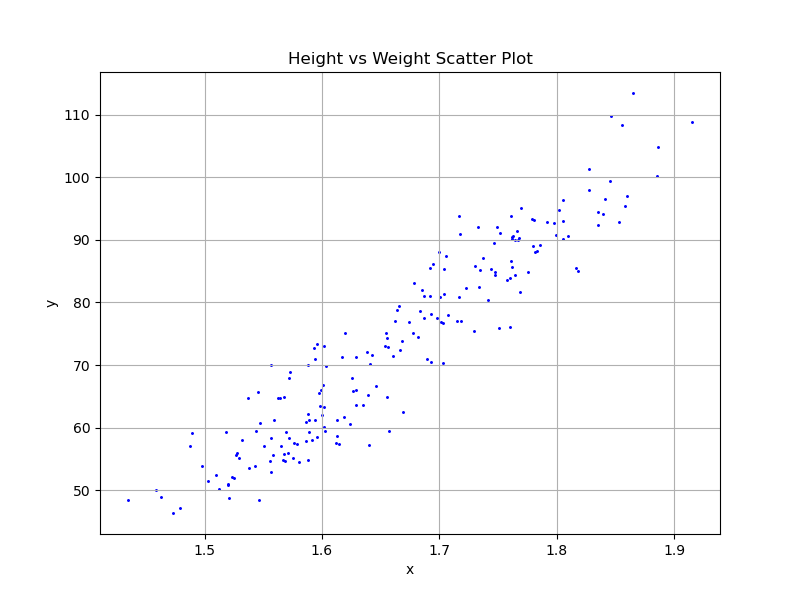

In [138]:
plt.figure(figsize=(8,6))
plt.scatter(height_sub, weight_sub, marker='.', color='b', s=5)
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.title("Height vs Weight Scatter Plot")
plt.show()

In [ ]:
y.shape, tx.shape

Best parameters: w0 = 72.72727272727272, w1 = 13.636363636363626, with loss = 14.405193928041571


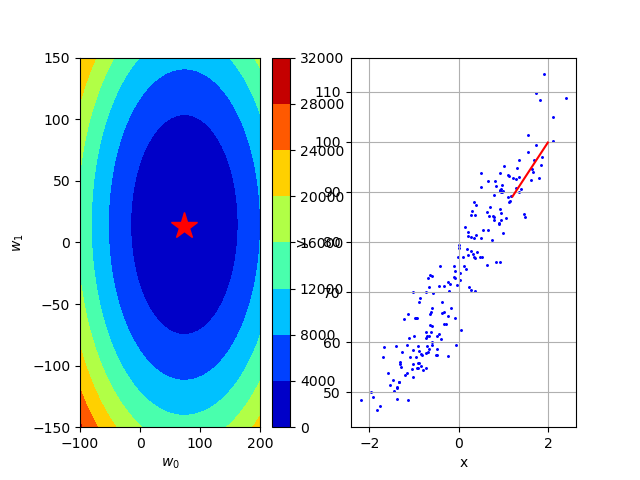

Grid Search: loss*=14.405193928041571, w0*=72.72727272727272, w1*=13.636363636363626, execution time=0.143 seconds


In [140]:
# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=100)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y_sub, tx_sub, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print(
    "Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
        l=loss_star, w0=w0_star, w1=w1_star, t=execution_time
    )
)

In [146]:
height_out, weight_out, gender = load_data(sub_sample=True, add_outlier=True)
x_out, mean_x_out, std_x_out = standardize(height_out)
y_out, tx_out = build_model_data(x_out, weight_out)

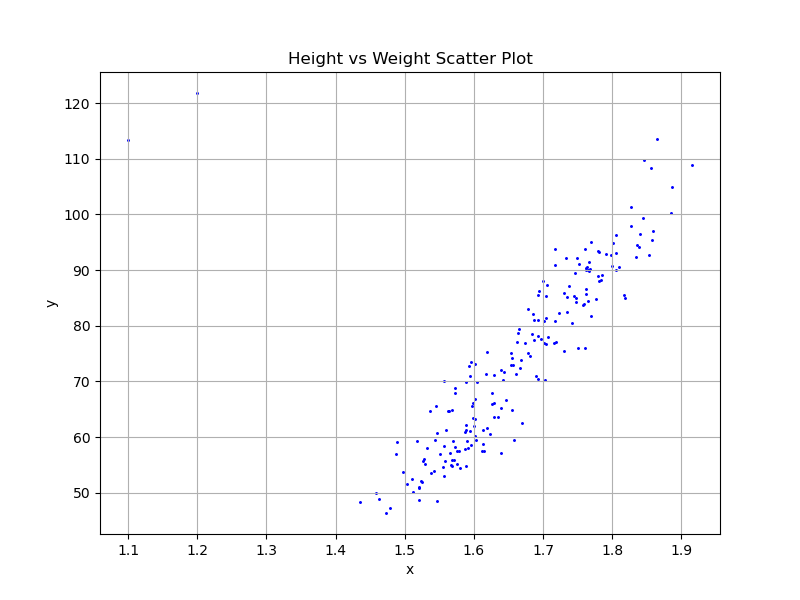

In [147]:
plt.figure(figsize=(8,6))
plt.scatter(height_out, weight_out, marker='.', color='b', s=5)
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.title("Height vs Weight Scatter Plot")
plt.show()

Best parameters: w0 = 72.72727272727272, w1 = 10.606060606060595, with loss = 66.92119404701603


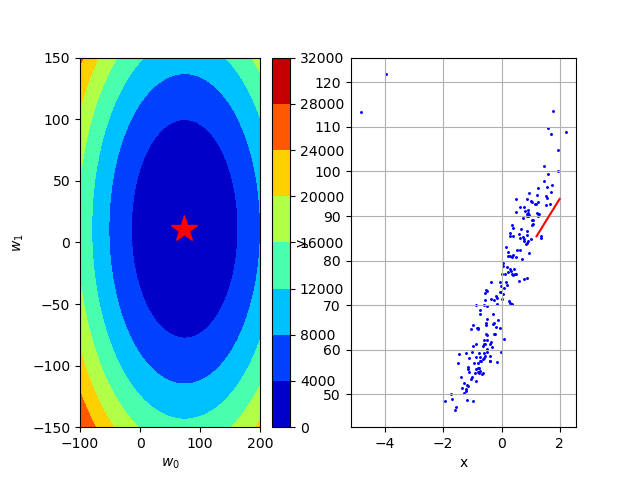

Grid Search: loss*=66.92119404701603, w0*=72.72727272727272, w1*=10.606060606060595, execution time=0.136 seconds


In [143]:
# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=100)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y_out, tx_out, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print(
    "Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
        l=loss_star, w0=w0_star, w1=w1_star, t=execution_time
    )
)

In [148]:
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
start_time = datetime.datetime.now()

# ***************************************************
# INSERT YOUR CODE HERE
# TODO: fit the model to the subsampled data / subsampled data with outliers and visualize the cloud of points
#       and the model fit
# ***************************************************
gd_losses, gd_ws = gradient_descent(y_out, tx_out, w_initial, max_iters, gamma)



end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("GD: execution time={t:.3f} seconds".format(t=exection_time))

GD iter. 0/49: loss=2869.8351145358524, w0=51.84746409844842, w1=7.7244264061924195
GD iter. 1/49: loss=318.2821247015965, w0=67.40170332798297, w1=10.041754328050114
GD iter. 2/49: loss=88.6423556165128, w0=72.06797509684336, w1=10.736952704607411
GD iter. 3/49: loss=67.9747763988552, w0=73.46785662750146, w1=10.945512217574597
GD iter. 4/49: loss=66.11469426926602, w0=73.88782108669889, w1=11.00808007146475
GD iter. 5/49: loss=65.94728687760302, w0=74.01381042445813, w1=11.026850427631798
GD iter. 6/49: loss=65.93222021235334, w0=74.0516072257859, w1=11.032481534481914
GD iter. 7/49: loss=65.93086421248087, w0=74.06294626618423, w1=11.034170866536945
GD iter. 8/49: loss=65.93074217249234, w0=74.06634797830372, w1=11.034677666153454
GD iter. 9/49: loss=65.93073118889338, w0=74.06736849193958, w1=11.034829706038408
GD iter. 10/49: loss=65.93073020036947, w0=74.06767464603033, w1=11.034875318003895
GD iter. 11/49: loss=65.93073011140231, w0=74.06776649225755, w1=11.034889001593541
GD it

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

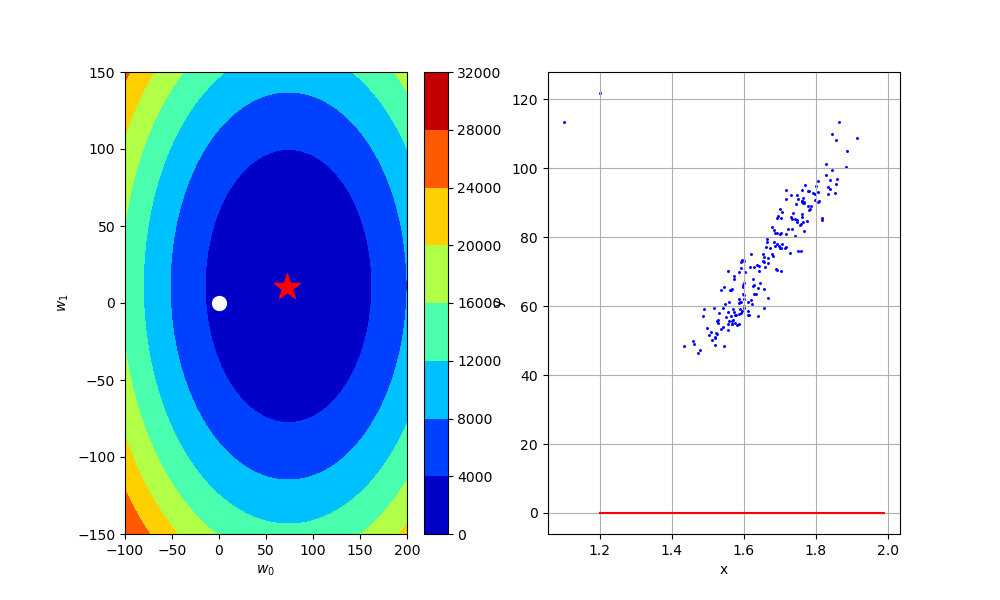

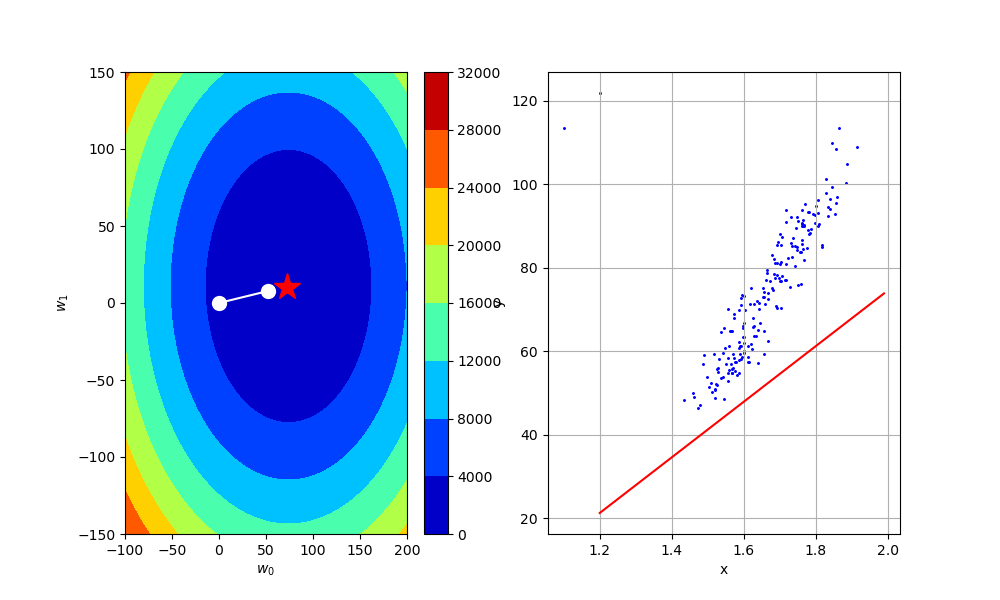

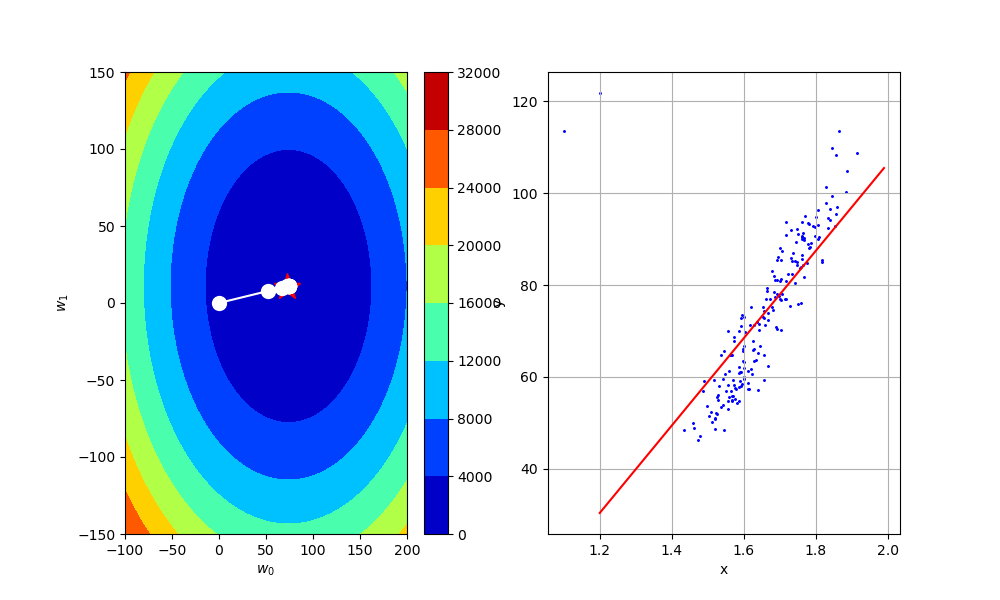

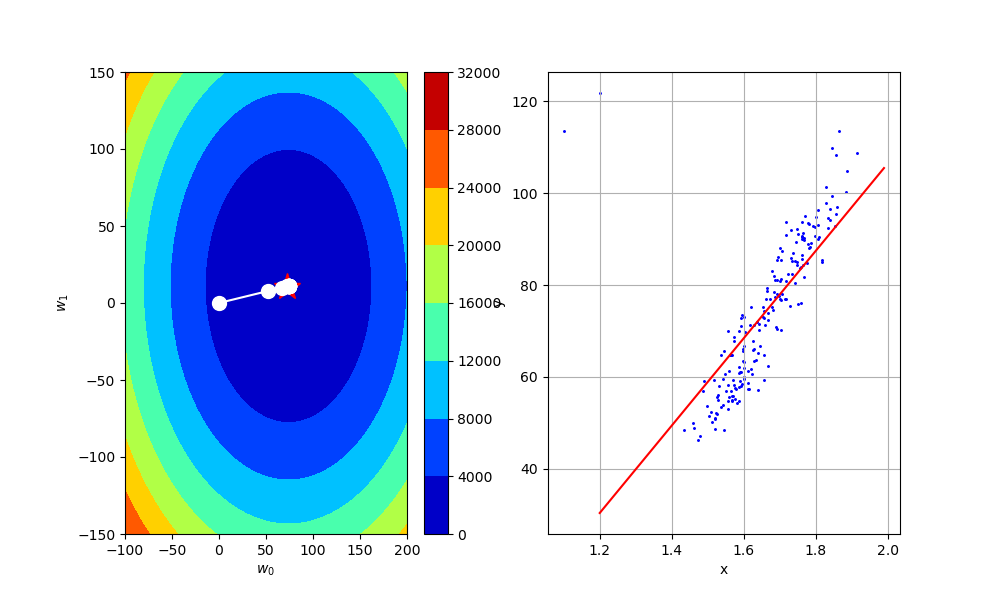

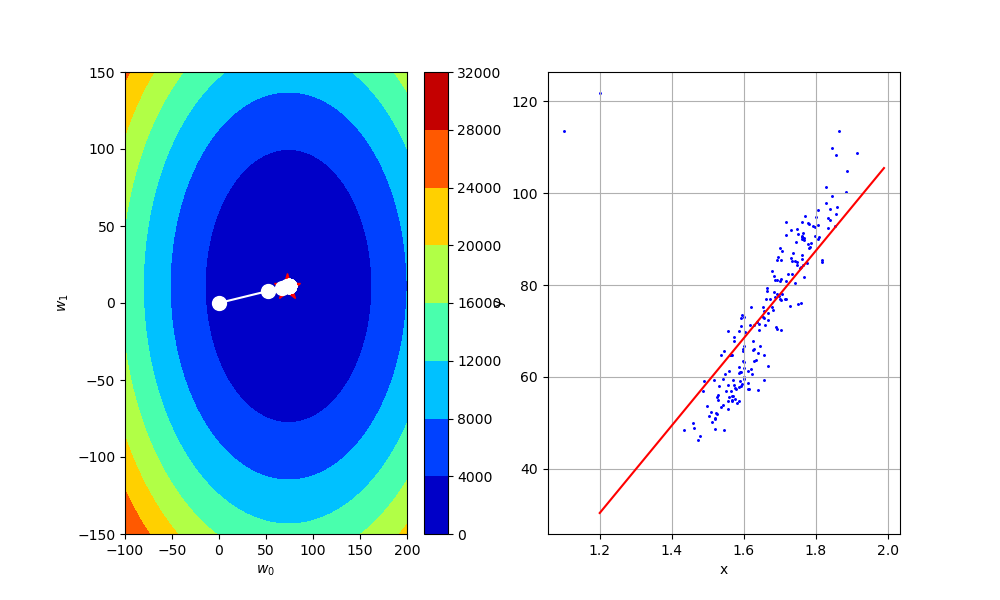

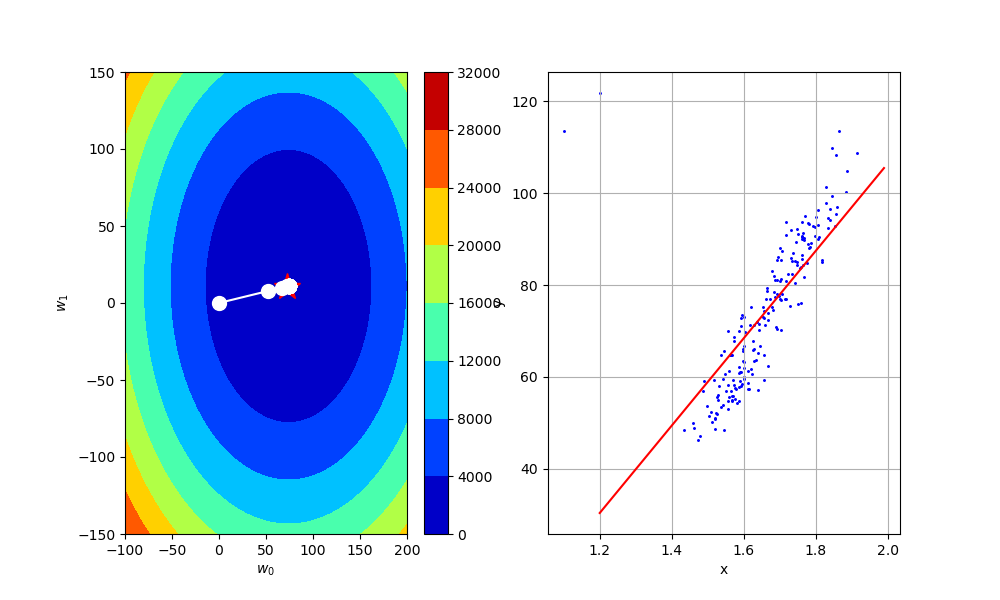

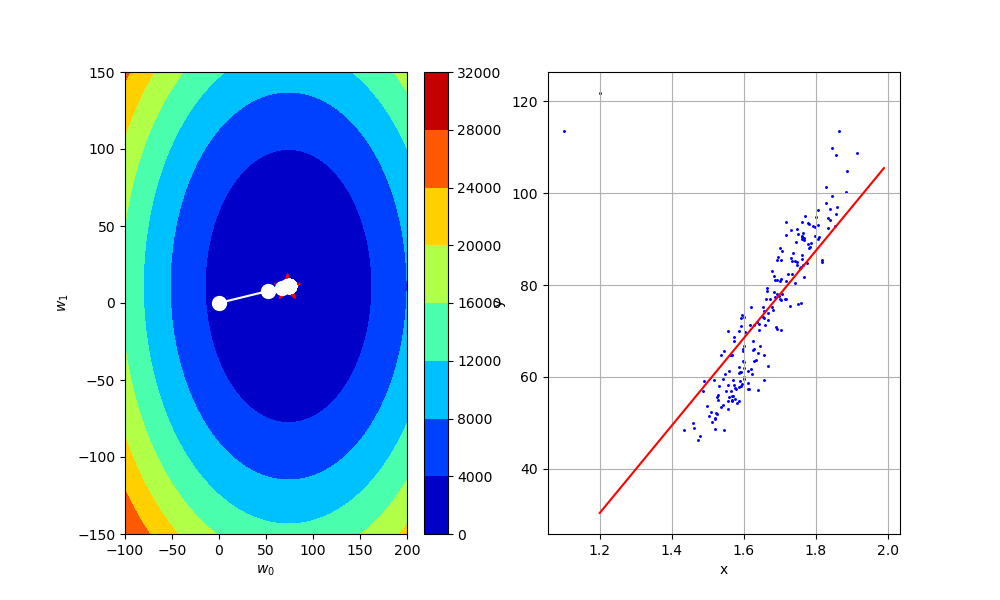

In [149]:
# Time Visualization
from ipywidgets import IntSlider, interact


def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gd_losses,
        gd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x_out,
        std_x_out,
        height_out,
        weight_out,
        n_iter,
    )
    fig.set_size_inches(10.0, 6.0)


interact(plot_figure, n_iter=IntSlider(min=1, max=len(gd_ws)))

# 6. Subgradient descent

In [ ]:
def compute_subgradient_mae(y, tx, w):
    """Compute a subgradient of the MAE at w.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        w: numpy array of shape=(2, ). The vector of model parameters.

    Returns:
        A numpy array of shape (2, ) (same shape as w), containing the subgradient of the MAE at w.
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute subgradient gradient vector for MAE
    # ***************************************************
    raise NotImplementedError

In [ ]:
def subgradient_descent(y, tx, initial_w, max_iters, gamma):
    """The SubGradient Descent (SubGD) algorithm.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        max_iters: a scalar denoting the total number of iterations of GD
        gamma: a scalar denoting the stepsize

    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of SubGD
        ws: a list of length max_iters containing the model parameters as numpy arrays of shape (2, ), for each iteration of SubGD
    """
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: compute subgradient and loss
        # ***************************************************
        raise NotImplementedError
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: update w by subgradient
        # ***************************************************
        raise NotImplementedError

        ws.append(w)
        losses.append(loss)
        print(
            "SubGD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
                bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]
            )
        )

    return losses, ws

In [ ]:
# Define the parameters of the algorithm.
max_iters = 500
gamma = 0.7
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SubSGD.
start_time = datetime.datetime.now()
subgd_losses, subgd_ws = subgradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SubGD: execution time={t:.3f} seconds".format(t=exection_time))

In [ ]:
from ipywidgets import IntSlider, interact


def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        subgd_losses,
        subgd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    fig.set_size_inches(10.0, 6.0)


interact(plot_figure, n_iter=IntSlider(min=1, max=len(subgd_ws)))

# Stochastic Subgradient Descent

**NB** for the computation of the subgradient you can reuse the `compute_subgradient` method that you implemented above, just making sure that you pass in a minibatch as opposed to the full data.

In [ ]:
def stochastic_subgradient_descent(y, tx, initial_w, batch_size, max_iters, gamma):
    """Compute a stochastic subgradient at w from a data sample batch of size B, where B < N, and their corresponding labels.

    Args:
        y: numpy array of shape=(B, )
        tx: numpy array of shape=(B,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        batch_size: a scalar denoting the number of data points in a mini-batch used for computing the stochastic subgradient
        max_iters: a scalar denoting the total number of iterations of SubSGD
        gamma: a scalar denoting the stepsize

    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of SubSGD
        ws: a list of length max_iters containing the model parameters as numpy arrays of shape (2, ), for each iteration of SubSGD
    """

    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w

    for n_iter in range(max_iters):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: implement stochastic subgradient descent.
        # ***************************************************
        raise NotImplementedError

        print(
            "SubSGD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
                bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]
            )
        )
    return losses, ws

In [ ]:
# Define the parameters of the algorithm.
max_iters = 500
gamma = 0.7
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SubSGD.
start_time = datetime.datetime.now()
subsgd_losses, subsgd_ws = stochastic_subgradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma
)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SubSGD: execution time={t:.3f} seconds".format(t=exection_time))

In [ ]:
from ipywidgets import IntSlider, interact


def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        subsgd_losses,
        subsgd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    fig.set_size_inches(10.0, 6.0)


interact(plot_figure, n_iter=IntSlider(min=1, max=len(subsgd_ws)))